<a href="https://colab.research.google.com/github/akhilsrinath/IPythonNotebooks/blob/master/Akhil_Srinath_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **CSP-571 : Data Preparation and Analysis**
## **Homework 3**
## **Akhil Srinath (A20460158)**



---





# **Diamonds dataset**
- This classic dataset contains the prices and different attributes of almost 54,000 diamonds. 
- The data is from a public dataset on [Kaggle](https://www.kaggle.com/) uploaded by Shivam Agrawal on 05/24/2017.

- It is a great dataset for us to start learning how to work with raw data and learn the techniques to clean and preprocess data along with visualizing some simple results. 

- Let's get started 



### **Importing the libraries**

The frist step is to import the necessary libraries we will need to work with our data. 

In [78]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns 

### **Importing the dataset**
We then import the Diamonds dataset into a Pandas dataframe so that we can use all the cool features that Pandas has to offer us. Let's go ahead and do that. 

We use the read_csv method in Pandas to import the data file from our local machine to a Pandas dataframe. 

In [79]:
df = pd.read_csv('/content/drive/MyDrive/CSP 571/diamonds.csv')   # importing our data


Since our dataset contains a large number of records, we can verify that the data has been imported by displaying just the first and last five rows of the dataset using the 'head' and 'tail' methods from Pandas. 

In [80]:
# Verifying that the data has been imported 

df.head(5)      # first five rows of the dataset

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [81]:
df.tail(5)      # last five rows of the dataset

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


### **Data Preprocessing**

We are now ready to start taking a closer look at our data and find out some interesting results and patterns that may help understand our data more, in turn help in deriving results from the data at a later stage. 

As we can see, the dataset contains information about the price and several other attributes related to diamonds. The attributes are listed below : 
- **Carat**: weight of the diamond (0.2--5.01)

- **Cut**: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

- **Color**: diamond colour, from J (worst) to D (best)

- **Clarity**: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

- **x**: length in mm (0--10.74)

- **y**: width in mm (0--58.9)

- **z**: depth in mm (0--31.8)

- **Depth**: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

- **Table**: width of top of diamond relative to widest point (43--95)

- **Price**: (dependent variable)


In [82]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


If we take a closer look at our data, we can observe that the column "Unnamed: 0" serves as an index to our data. Hence, we can rename the column appropriately. 

In [83]:
df = df.rename(columns={"Unnamed: 0": "index"})    # Rename column
df.head()

,index,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Let us start our preprocessing by looking at some of the features of our data. 

In [84]:
## How many records present in the dataset 

len(df)

53940

In [85]:
## Descriptive statistics 
df.describe()

,index,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


By default, the describe() function only provides statistics for numerical variables. We can take a look at the categorical variables separately if required. 

In [86]:
## Check for any missing values in our data 

df.isnull()

,index,carat,cut,color,clarity,depth,table,price,x,y,z
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
53935,False,False,False,False,False,False,False,False,False,False,False
53936,False,False,False,False,False,False,False,False,False,False,False
53937,False,False,False,False,False,False,False,False,False,False,False
53938,False,False,False,False,False,False,False,False,False,False,False


The above method does not really help us much in terms of checking if there are any missing values in our ENTIRE dataset. We can make use of the any() function to check exactly which columns contain missing values in our data. 

In [87]:
# Check for missing values 

df.isnull().any()

index      False
carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool

As we can see, there are no missing values in our dataset! :)

We can also take a look at the datatypes of the different attributes present in our data. We use the info() method from Pandas that gives us the datatype as well as the number of non-zero values in each column of our dataframe. 

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   table    53940 non-null  float64
 7   price    53940 non-null  int64  
 8   x        53940 non-null  float64
 9   y        53940 non-null  float64
 10  z        53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


We can summarize the datatypes in our dataset as : 
- **int** : index, price 
- **float** : carat, depth, table, x, y, z 
- **object** : cut, color, clarity

### **Describing the attributes**

Let us now take 4 variables independently from our dataset and describe them in detail. 

### **Carat (Numeric attribute)**



In [89]:
# descriptive statistics

df['carat'].describe()

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

#### Histogram
Let us look at how the carat variable is distributed usning a histogram. 

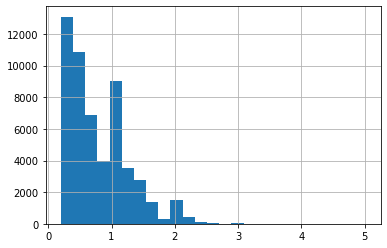

In [90]:
# histogram 

df['carat'].hist(bins=25)

From the histogram, we can infer that a majority of the carat values of the diamonds in the data lie between 0 and 1. However, there are many diamonds with carat values slightly above than 1 as well. 

#### Box-plot

Aside from the describe() function, another way to know the quantiles as well as the distribution of our data is using box-plots. Let us use a box-plot to look at the carat variable closer. 

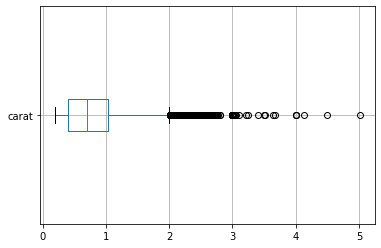

In [91]:
# Box-plot 

df['carat'].plot.box(vert=False, grid=True)

From the box-plot above, we can infer the following :   
- First quartile : 0.2
- Second quartile : 0.4 
- Third quartile : 1
- Fourth quartile : 2
- Plenty of outliers above the threshold of 2 



### **Price variable (Numeric attribute)**

In [92]:
# descriptive statistics

df['price'].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

#### Histogram 

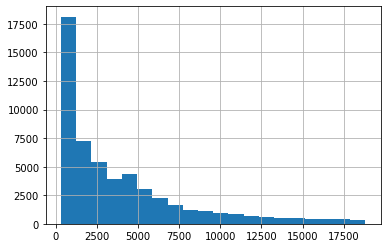

In [93]:
df['price'].hist(bins=20)

From the histogram, we can infer that 
- Most of the diamonds in our datast have prices between 300 and 1250 dollars. 
- The distribution of the price variable is skewed to the right. 


We can check exactly how much the price data is skewed. 

In [94]:
df['price'].skew()

1.618395283383529

To reduce the skewness in our target variable, we can apply a log transformation on the variable which then makes it more evenly distributed. Let us go ahead and do that using the NumPy module. 

In [95]:
# Reducing skewness 

price_log = np.log(df['price'])
price_log.skew()

0.11529585821715065

As we can see, the skewness for the price variable has reduced considerably after the log transformation. We should now expect a more evenly distributed histogram for the converted price variable. 

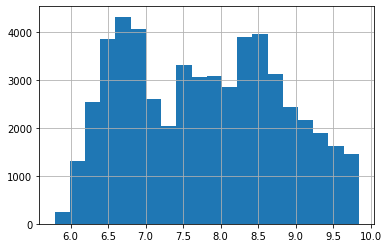

In [96]:
price_log.hist(bins=20)

Voila! :)

#### Box-plot

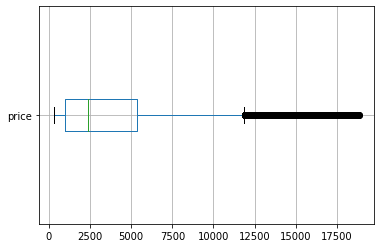

In [97]:
# Box-plot 

df['price'].plot.box(vert=False, grid=True)

From the box-plot, we can infer the following : 
- First quartile : 300
- Second quartile : 700
- Third quartile : 5500
- Fourth quartile : 12000
- Plenty of outliers above the threshold of 12000

### **Cut variable (Categorical attribute)**

First, let us look at the different types of cuts that the diamonds in our dataset can take. 

In [98]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

As we can see, there are several types that describe the cut of a diamond : 
- Ideal 
- Premium
- Good
- Very Good
- Fair 

Let us take a look at the counts of the different types of cut in the data. 

In [99]:
# Counts of the different cuts 

df['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

We see that most of the diamonds in the dataset have an "Ideal" type of cut whereas relatively fewer diamonds have a "Good" and "Fair" type of cut. 

The results above can also be visualized.

#### Bar plot

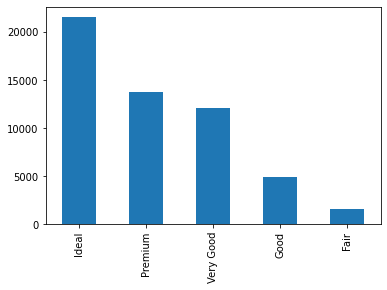

In [100]:
# Visualizing the counts of type of cut 

df['cut'].value_counts().plot.bar()

#### Pie chart

We can also use a pie chart to visualize the frequency of the different types of cuts. 

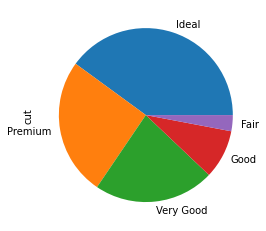

In [101]:
df['cut'].value_counts().plot.pie()

The plots above are a quick way to visaulize the distribution of categorical variables in our data. 

### **Clarity variable (Categorical attribute)**

In [102]:
# Count of the different clarities 

df['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

We see that most of the diamonds have clarities belonging to either the 'SI1' or the 'VS2' category. Whereas very few of the diamonds have clarity belonging to the 'I1' category. 

#### Bar plot


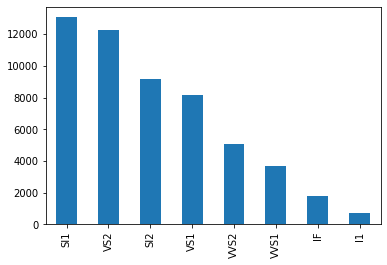

In [103]:
# Bar plot 

df['clarity'].value_counts().plot.bar()

#### Pie chart 


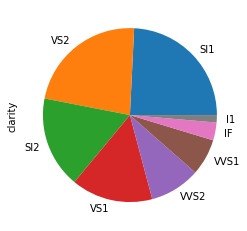

In [104]:
# Pie chart 

df['clarity'].value_counts().plot.pie()